<a href="https://colab.research.google.com/github/nan-park/section2_project/blob/main/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
from google.colab import files
files.upload();

Saving kor_economic_monthly_data.csv to kor_economic_monthly_data (1).csv
Saving kor_economic_monthly_data_clean.csv to kor_economic_monthly_data_clean (1).csv
Saving kor_economic_yearly_data.csv to kor_economic_yearly_data (1).csv
Saving kor_loan_data.csv to kor_loan_data (1).csv
Saving us_economic_monthly_data.csv to us_economic_monthly_data (1).csv
Saving us_economic_monthly_data_clean.csv to us_economic_monthly_data_clean (1).csv


In [4]:
kor_economic_monthly_data = pd.read_csv('kor_economic_monthly_data.csv', index_col=0) # 한국 월별 경제지표(결측치O)(1960-05~2022-08)
kor_economic_monthly_data_clean = pd.read_csv('kor_economic_monthly_data_clean.csv', index_col=0) # 한국 월별 경제지표(결측치X)(1999-05~2022-05)
kor_economic_yearly_data = pd.read_csv('kor_economic_yearly_data.csv', index_col=0) # 한국 연도별 경제지표(결측치O)(1970~2021)
kor_loan_data = pd.read_csv('kor_loan_data.csv', index_col=0) # 한국 가계/기업/국채 대출현황 데이터
us_economic_monthly_data = pd.read_csv('us_economic_monthly_data.csv', index_col=0) # 미국 월별 경제지표(결측치O)(1947-01~2022-09-01)
us_economic_monthly_data_clean = pd.read_csv('us_economic_monthly_data_clean.csv', index_col=0) # 미국 월별 경제지표(1986-01~2022-05)

In [5]:
df_list = [kor_economic_monthly_data, kor_economic_monthly_data_clean, kor_economic_yearly_data, kor_loan_data, us_economic_monthly_data, us_economic_monthly_data_clean]

index의 데이터타입 모두 datetime으로 바꾸기

In [6]:
for i in range(len(df_list)):
  df_list[i].index = pd.to_datetime(df_list[i].index)

**미국 연준 기준금리**

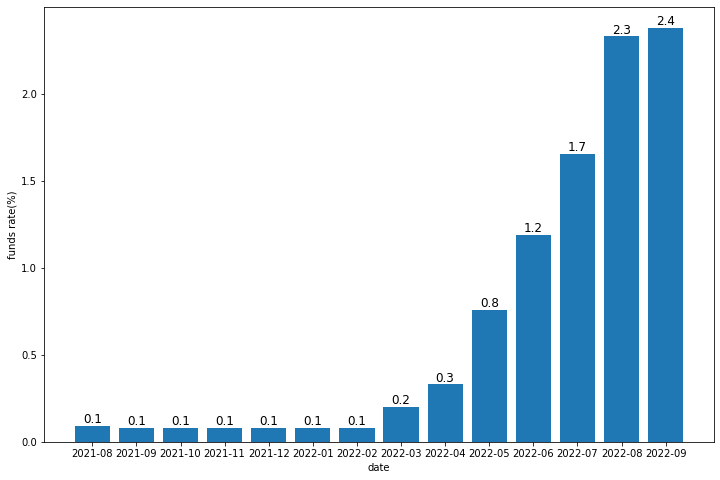

In [7]:
funds_rate = us_economic_monthly_data[us_economic_monthly_data['funds_rate'].isna()==False].funds_rate  # 1954-07~2021-09
funds_rate_2022 = funds_rate['2021-08':'2022']
funds_rate_2022.index = funds_rate_2022.index.astype(str).str[:-3]
plt.figure(figsize=(12, 8))
bar = plt.bar(funds_rate_2022.index, funds_rate_2022.values)
for rect in bar:
  height = rect.get_height()
  plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)
plt.xlabel('date')
plt.ylabel('funds rate(%)')
plt.show()

In [8]:
us_economic_monthly_data_clean.drop('GDP', axis=1, inplace=True)  # GDP 컬럼 드랍

In [9]:
us_economic_monthly_data_clean.columns = ['미국_연준_기준금리', '국제유가_WTI', '미국_소비자물가지수', '미국_국채금리_3년물', '미국_실업률', '미국_월별_경제성장률']

상관관계 보기(heatmap)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_

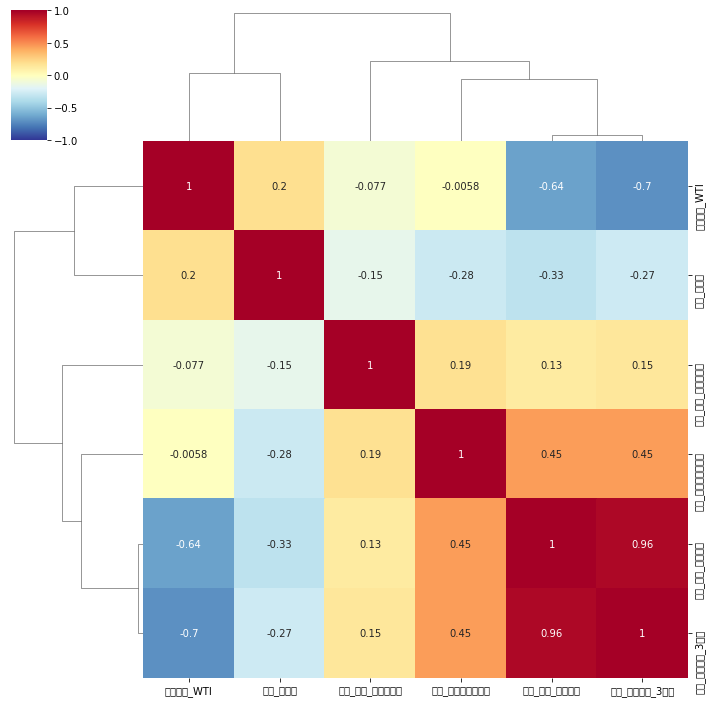

In [10]:
us_corr = us_economic_monthly_data_clean.corr()
sns.clustermap(us_corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
plt.show()